## Convolutional Neural Network

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

In [10]:
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist.load_data()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Data Reshape

In [12]:
X_train_full = X_train_full.reshape((60000,28,28,1))

In [13]:
X_test = X_test.reshape((10000, 28, 28, 1))

## Data Normalization

In [14]:
X_train_n = X_train_full / 255

In [15]:
X_test_n = X_test / 255

## Split data into train/validation/test datasets

In [16]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]

In [17]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [18]:
X_test = X_test_n

## Create model architecture

In [19]:
np.random.seed(42)

In [20]:
tf.random.set_seed(42) 

In [21]:
model = keras.models.Sequential()

In [23]:
model.add(keras.layers.Conv2D(filters=32,kernel_size = (3,3),strides=1,padding="valid", activation="relu", input_shape=(28,28,1)))

In [24]:
model.add(keras.layers.MaxPooling2D((2,2)))

In [25]:
model.add(keras.layers.Flatten())

In [26]:
model.add(keras.layers.Dense(300, activation="relu"))

In [27]:
model.add(keras.layers.Dense(100, activation="relu"))

In [28]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [30]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics =["accuracy"])

In [31]:
model_history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 13s 15ms/step - loss: 1.2809 - accuracy: 0.5730 - val_loss: 0.7445 - val_accuracy: 0.7394
Epoch 2/10
860/860 [==============================] - 13s 15ms/step - loss: 0.5660 - accuracy: 0.7969 - val_loss: 0.4949 - val_accuracy: 0.8156
Epoch 3/10
860/860 [==============================] - 14s 16ms/step - loss: 0.4945 - accuracy: 0.8204 - val_loss: 0.9342 - val_accuracy: 0.7064
Epoch 4/10
860/860 [==============================] - 14s 17ms/step - loss: 0.4546 - accuracy: 0.8386 - val_loss: 0.4134 - val_accuracy: 0.8572
Epoch 5/10
860/860 [==============================] - 14s 16ms/step - loss: 0.4343 - accuracy: 0.8444 - val_loss: 0.4353 - val_accuracy: 0.8482
Epoch 6/10
860/860 [==============================] - 14s 16ms/step - loss: 0.3982 - accuracy: 0.8566 - val_loss: 0.3775 - val_accuracy: 0.8696
Epoch 7/10
860/860 [==============================] - 14s 16ms/step - loss: 0.3826 - accuracy: 0.8651 - val_loss: 0.4111 - val_accuracy:

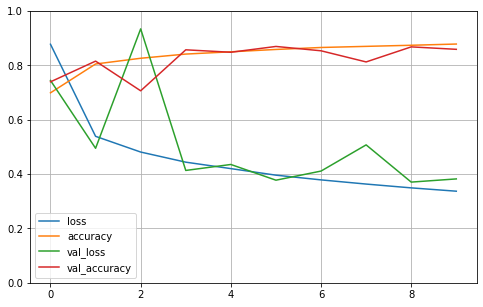

In [32]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8463


In [34]:
ev

[0.4137086570262909, 0.8463000059127808]

In [35]:
X_new = X_test[:3]

In [37]:
y_pred = model.predict_classes(X_new)

In [38]:
y_pred

array([9, 2, 1])

In [39]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


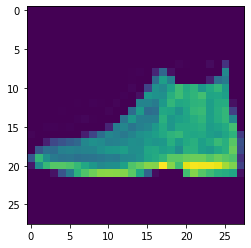

In [40]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [41]:
keras.backend.clear_session()

In [42]:
del model